# Project 1: SAT & ACT Analysis



## Problem Statement

With the new format of the SAT, the College board has seen a lack of participation across multiple regions of America as compared to the ACT. Specifically, the midwest and southern regions has seen low rates year over year. I will utilize the 2017 and 2018 SAT data to help strategize next steps for the College Board in order to increase market share in these regions. 

## Executive Summary

In order to analyze the data, the first step was to merge all of the data sets to compare different metrics. To visualize the participation rates by region, I created a map of the US that was color coded by rate. Through this, it was easy to see that the midwest/southern areas had <5% participation on the SAT. From this region, Iowa stood out as the only mid west state with a participation rate that was not nearing 100%. 

Iowa currently does not require the ACT or the SAT. Instead, they have in place the ISASP. Perhaps students are opting to rely on just the ISASP rather than the ACT or SAT. In 2019 however, 3% of Iowa's high schools had graduation rates of under 67%. Additionally, 24% of Iowa high schools were seen as needing "targeted support and improvement" as a subgroup of the student population had scores as low as the lowest 5% of the state. 

As Iowa does not require the ACT or the SAT, it is understandable that their participation rates are considerably lower than their other midwest counterparts who do require at least one exam. Interestingly, from EDA it can be noted that Iowa's average total SAT scores ranked in the top 5 nationally. EDA helped to single out Iowa from the other states as a state with high opportunity to increase participation rates. The College Board can aim to target the remaining students who do not take either exam.  

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

*All libraries used should be added here*

In [464]:
#Imports:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [465]:
#Code:

sat_2017 = pd.read_csv("./data/sat_2017.csv")
act_2017 = pd.read_csv("./data/act_2017.csv")

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [466]:
#Code:

sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [467]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

**Answer**: The data describes each state's participation rates for the SAT and ACT. I am assuming that the numbers for each section of the exams are the averages. 

#### 4a. Does the data look complete? 

In [468]:
# Check for null values to see if data is complete

print(sat_2017.isnull().sum())

print(act_2017.isnull().sum())

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64
State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64


**Answer**: The SAT data set does not have the national average included while the ACT data set does. However, there are no null values for each so it is complete for each state. 

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

**Answer**:
- For Maryland, the Math SAT score is missing an integer. Our data shows 52 while it should be 524. 
- The same thing happens for Maryland for the Science ACT score. The score should be 23.2 but our data shows 2.3.
- Wyoming's composite score ends with an 'x'

- The minimum value for the SAT total is 400 while the max is 1600
- The minimnum value for the ACT composite is 1 while the max is 36

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [469]:
#code

# Change Math SAT and Science ACT scores for Maryland 
sat_2017.loc[sat_2017['State'] == 'Maryland', 'Math'] = 524
act_2017.loc[act_2017['State'] == 'Maryland', 'Science'] = 23.2

# Change Wyoming composite score to 20.2 not 20.2x 
act_2017.loc[act_2017['State'] == 'Wyoming', 'Composite'] = 20.2

#### 5. What are your data types? 
Display the data types of each feature. 

In [470]:
#code
print('SAT Data type \n', sat_2017.dtypes, '\n')

print('ACT Data Type \n', act_2017.dtypes)

SAT Data type 
 State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object 

ACT Data Type 
 State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

**Answer**: The composite score for the ACT should be a float rather than an object. The participation should be a numeric type

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [471]:
# Changing 2017 ACT Composite scores to type float64

act_2017['Composite'] = act_2017['Composite'].astype('float64')

In [472]:
# Function to change percent string data type to float64. Dividing by 100 to change into decimal 
def change_percent(val):
    return float(val.strip('%'))

In [473]:
act_2017['Participation'] = act_2017['Participation'].apply(change_percent)

In [474]:
sat_2017['Participation'] = sat_2017['Participation'].apply(change_percent)

- Fix any individual values preventing other columns from being the appropriate type.

In [475]:
def change_float(val):
    return float(val)

act_2017['Composite'] = act_2017['Composite'].apply(change_float)
sat_2017['Total'] = sat_2017['Total'].apply(change_float)
sat_2017['Math'] = sat_2017['Math'].apply(change_float)
sat_2017['Evidence-Based Reading and Writing'] = sat_2017['Evidence-Based Reading and Writing'].apply(change_float)

- Finish your data modifications by making sure the columns are now typed appropriately.

In [476]:
#code

- Display the data types again to confirm they are correct.

In [477]:
print("Data Types for ACT 2017\n", act_2017.dtypes, '\n')
print("Data Types for SAT 2017\n", sat_2017.dtypes)

Data Types for ACT 2017
 State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object 

Data Types for SAT 2017
 State                                  object
Participation                         float64
Evidence-Based Reading and Writing    float64
Math                                  float64
Total                                 float64
dtype: object


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [478]:
# Set data frame names in order to append to new column names
sat_2017.name = 'sat_2017'
act_2017.name = 'act_2017'

# Function will update column names to lower case and adds data frame name at the end
def column_update(df):
    new_columns = []
    for col in df.columns:
        
        # IF column name is State return state
        if col == 'State':
            new_columns.append(col.lower())
        else:
            col = str(col.lower().replace(" ", "_").replace("-","_")) + "_" + df.name
            new_columns.append(col)
    return new_columns


In [479]:
sat_2017.columns = column_update(sat_2017) 

In [480]:
sat_2017.columns

Index(['state', 'participation_sat_2017',
       'evidence_based_reading_and_writing_sat_2017', 'math_sat_2017',
       'total_sat_2017'],
      dtype='object')

In [481]:
act_2017.columns = column_update(act_2017)

In [482]:
act_2017.columns

Index(['state', 'participation_act_2017', 'english_act_2017', 'math_act_2017',
       'reading_act_2017', 'science_act_2017', 'composite_act_2017'],
      dtype='object')

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*object*|All |All 50 states and District of Columbia.| 
|**participation**|*float*|All|The percent of students who participated in either the SAT or ACT, specified by test and year.|
|**evidence based reading and writing**|*float*|SAT data|The average score for evidence based reading and writing for the SAT.|
|**math**|*float*|All|The average math score. Both exams have a math section and columns are specified by test and year.|
|**total**|*float*|SAT data|The average total score for the SAT.|
|**english**|*float*|ACT data|The average score for the english section of the ACT.|
|**reading**|*float*|ACT data|The average score for the reading section of the ACT.|
|**science**|*float*|ACT data|The average score for the science section of the ACT.|
|**composite**|*float*|ACT data|The average composite score for the ACT.|

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [483]:
# Removing National data from the ACT data set
act_2017 = act_2017[act_2017['state'] != 'National']

In [484]:
act_2017.head()

,state,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
5,California,31.0,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [485]:
combined_2017 = pd.merge(sat_2017, act_2017, how='outer')

In [486]:
combined_2017.head()

,state,participation_sat_2017,evidence_based_reading_and_writing_sat_2017,math_sat_2017,total_sat_2017,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017
0,Alabama,5.0,593.0,572.0,1165.0,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,38.0,547.0,533.0,1080.0,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,30.0,563.0,553.0,1116.0,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3.0,614.0,594.0,1208.0,100.0,18.9,19.0,19.7,19.5,19.4
4,California,53.0,531.0,524.0,1055.0,31.0,22.5,22.7,23.1,22.2,22.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [487]:
combined_2017.to_csv("./data/combined_2017.csv")

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [488]:
sat_2018 = pd.read_csv("./data/SAT2018_Testing _Data.csv")
act_2018 = pd.read_csv("./data/ACT2018_Testing_Data.csv")

In [489]:
# Remove null values from ACT data frame
act_2018 = act_2018[act_2018['State'].notnull()]

In [490]:
# Remove null values and columns from SAT data frame
sat_2018 = sat_2018.dropna(axis = 1, how = 'all')[sat_2018['State'].notnull()]

In [491]:
# Remove duplicate states from ACT data
act_2018.drop_duplicates(subset = 'State',
                        keep = 'first',
                        inplace = True)

In [492]:
# Reset index to go from 0-50 for ACT 2018 
act_2018 = act_2018.reset_index(drop=True)

In [493]:
# Read in missing columns for ACT 2018 
act_2018_missing = pd.read_csv("./data/ACT_2018_2.csv")

In [494]:
# Renames D.C. to follow naming convention of other dataframes 
act_2018['State'] = act_2018['State'].replace('District of columbia', 'District of Columbia')

In [495]:
# Merge missing ACT data with given ACT data from Boom
act_2018 = pd.merge(act_2018, act_2018_missing, how = 'outer')

In [496]:
# Change Participation data type to float64
act_2018['Participation'] = act_2018['Participation'].apply(change_percent)

In [497]:
# Change participation data type to float64
sat_2018['Participation'] = sat_2018['Participation'].apply(change_percent)

In [498]:
# Set names for dataframe in order to rename columns 
sat_2018.name = 'sat_2018'
act_2018.name = 'act_2018'

In [499]:
# Rename columns to fit format and include test and year
sat_2018.columns = column_update(sat_2018) 
act_2018.columns = column_update(act_2018) 

In [500]:
# Merge ACT and SAT 2018 data into one dataframe
combined_2018 = pd.merge(sat_2018, act_2018, how = 'outer')

In [501]:
combined_2018.head()

,state,participation_sat_2018,evidence_based_reading_and_writing_sat_2018,math_sat_2018,total_sat_2018,participation_act_2018,composite_act_2018,english_act_2018,math_act_2018,reading_act_2018,science_act_2018
0,Alabama,6.0,595.0,571.0,1166.0,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,43.0,562.0,544.0,1106.0,33.0,20.8,19.8,20.6,21.6,20.7
2,Arizona,29.0,577.0,572.0,1149.0,66.0,19.2,18.2,19.4,19.5,19.2
3,Arkansas,5.0,592.0,576.0,1169.0,100.0,19.4,19.1,18.9,19.7,19.4
4,California,60.0,540.0,536.0,1076.0,27.0,22.7,22.5,22.5,23.0,22.1


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [502]:
final = pd.merge(combined_2017, combined_2018, how = 'outer')

In [503]:
final.to_csv("./data/final.csv")

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [504]:
final.describe()

,participation_sat_2017,evidence_based_reading_and_writing_sat_2017,math_sat_2017,total_sat_2017,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2018,evidence_based_reading_and_writing_sat_2018,math_sat_2018,total_sat_2018,participation_act_2018,composite_act_2018,english_act_2018,math_act_2018,reading_act_2018,science_act_2018
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,556.882353,1126.098039,65.254902,20.931373,21.182353,22.013725,21.450980,21.519608,45.745098,563.686275,556.235294,1120.019608,61.725490,21.496078,20.988235,21.125490,22.015686,21.345098
std,35.276632,45.666901,47.121395,92.494812,32.140842,2.353677,1.981989,2.067271,1.739353,2.020695,37.314256,47.502627,47.772623,94.155083,34.037085,2.111583,2.446356,2.035765,2.167245,1.870114
min,2.000000,482.000000,468.000000,950.000000,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000,2.000000,480.000000,480.000000,977.000000,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,4.000000,533.500000,523.500000,1055.500000,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000,4.500000,534.500000,522.500000,1057.500000,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,38.000000,559.000000,548.000000,1107.000000,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,52.000000,552.000000,544.000000,1098.000000,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,66.000000,613.000000,599.000000,1212.000000,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000,77.500000,610.500000,593.500000,1204.000000,100.000000,23.650000,23.700000,23.150000,24.100000,23.050000
max,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,643.000000,655.000000,1298.000000,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [505]:
def std_dev(series):
    summation = 0
    for val in series:
        summation += ((val - series.mean()) ** 2)
    return ((summation / (len(series)-1)) ** .5)

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [506]:
final['math_sat_2017'].dtypes

dtype('float64')

In [507]:
sd = {c:std_dev(final[c]) for c in final.columns if final[c].dtype == 'float64'}

In [508]:
sd

{'participation_sat_2017': 35.276632270013046,
 'evidence_based_reading_and_writing_sat_2017': 45.66690138768932,
 'math_sat_2017': 47.12139516560329,
 'total_sat_2017': 92.49481172519046,
 'participation_act_2017': 32.14084201588683,
 'english_act_2017': 2.35367713980303,
 'math_act_2017': 1.9819894936505533,
 'reading_act_2017': 2.0672706264873146,
 'science_act_2017': 1.7393530462812443,
 'composite_act_2017': 2.020694891154341,
 'participation_sat_2018': 37.31425633039196,
 'evidence_based_reading_and_writing_sat_2018': 47.50262737831599,
 'math_sat_2018': 47.77262322095955,
 'total_sat_2018': 94.15508275097599,
 'participation_act_2018': 34.03708473496081,
 'composite_act_2018': 2.111583366510896,
 'english_act_2018': 2.4463562339793055,
 'math_act_2018': 2.035764538177723,
 'reading_act_2018': 2.1672445684804105,
 'science_act_2018': 1.8701137639716146}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [509]:
np.std(final)

participation_sat_2017                         34.929071
evidence_based_reading_and_writing_sat_2017    45.216970
math_sat_2017                                  46.657134
total_sat_2017                                 91.583511
participation_act_2017                         31.824176
english_act_2017                                2.330488
math_act_2017                                   1.962462
reading_act_2017                                2.046903
science_act_2017                                1.722216
composite_act_2017                              2.000786
participation_sat_2018                         36.946619
evidence_based_reading_and_writing_sat_2018    47.034610
math_sat_2018                                  47.301946
total_sat_2018                                 93.227424
participation_act_2018                         33.701736
composite_act_2018                              2.090779
english_act_2018                                2.422254
math_act_2018                  

**Answer:** Numpy uses the population, so they take n, whereas Pandas uses the sample, so they take n-1. I followed the Pandas method using n-1 in my standard deviation.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [510]:
# Lowest participation for 2017 SAT
final.sort_values('participation_sat_2017')[['state', 'participation_sat_2017', 'participation_act_2017']].head()

,state,participation_sat_2017,participation_act_2017
34,North Dakota,2.0,98.0
24,Mississippi,2.0,100.0
15,Iowa,2.0,67.0
25,Missouri,3.0,100.0
44,Utah,3.0,100.0


In [511]:
# Lowest participation for SAT 2018 
final.sort_values('participation_sat_2018')[['state', 'participation_sat_2018', 'participation_act_2018']].head()

,state,participation_sat_2018,participation_act_2018
34,North Dakota,2.0,98.0
50,Wyoming,3.0,100.0
41,South Dakota,3.0,77.0
27,Nebraska,3.0,100.0
49,Wisconsin,3.0,100.0


In [512]:
# Highest participation for SAT 2017
final.sort_values('participation_sat_2017', ascending = False)[['state', 'participation_sat_2017', 'participation_act_2017']].head()

,state,participation_sat_2017,participation_act_2017
8,District of Columbia,100.0,32.0
22,Michigan,100.0,29.0
6,Connecticut,100.0,31.0
7,Delaware,100.0,18.0
29,New Hampshire,96.0,18.0


In [513]:
# Highest participation for SAT 2018
final.sort_values('participation_sat_2018', ascending = False)[['state', 'participation_sat_2018', 'participation_act_2018']].head()

,state,participation_sat_2018,participation_act_2018
5,Colorado,100.0,30.0
6,Connecticut,100.0,26.0
7,Delaware,100.0,17.0
22,Michigan,100.0,22.0
12,Idaho,100.0,36.0


In [514]:
# Lowest participation for ACT 2017
final.sort_values('participation_act_2017')[['state', 'participation_sat_2017', 'participation_act_2017']].head()

,state,participation_sat_2017,participation_act_2017
19,Maine,95.0,8.0
29,New Hampshire,96.0,18.0
7,Delaware,100.0,18.0
39,Rhode Island,71.0,21.0
38,Pennsylvania,65.0,23.0


In [515]:
# Lowest participation for ACT 2018 
final.sort_values('participation_act_2018')[['state', 'participation_sat_2018', 'participation_act_2018']].head()

,state,participation_sat_2018,participation_act_2018
19,Maine,99.0,7.0
39,Rhode Island,97.0,15.0
29,New Hampshire,96.0,16.0
7,Delaware,100.0,17.0
38,Pennsylvania,70.0,20.0


In [516]:
# Highest participation for ACT 2017
final.sort_values('participation_act_2017', ascending = False)[['state', 'participation_sat_2017', 'participation_act_2017']].head()

,state,participation_sat_2017,participation_act_2017
0,Alabama,5.0,100.0
17,Kentucky,4.0,100.0
49,Wisconsin,3.0,100.0
44,Utah,3.0,100.0
42,Tennessee,5.0,100.0


In [517]:
# Highest participation for ACT 2018 
final.sort_values('participation_act_2018', ascending = False)[['state', 'participation_sat_2018', 'participation_act_2018']].head()

,state,participation_sat_2018,participation_act_2018
0,Alabama,6.0,100.0
17,Kentucky,4.0,100.0
49,Wisconsin,3.0,100.0
44,Utah,4.0,100.0
42,Tennessee,6.0,100.0


In [518]:
# Lowest mean value for total SAT 2017 
final.sort_values('total_sat_2017')[['state', 'total_sat_2017', 'total_sat_2018']].head()

,state,total_sat_2017,total_sat_2018
8,District of Columbia,950.0,977.0
7,Delaware,996.0,998.0
12,Idaho,1005.0,1001.0
22,Michigan,1005.0,1011.0
19,Maine,1012.0,1013.0


In [519]:
# Lowest mean value for total SAT 2018
final.sort_values('total_sat_2018')[['state', 'total_sat_2017', 'total_sat_2018']].head()

,state,total_sat_2017,total_sat_2018
8,District of Columbia,950.0,977.0
7,Delaware,996.0,998.0
48,West Virginia,1086.0,999.0
12,Idaho,1005.0,1001.0
44,Utah,1238.0,1010.0


In [520]:
# Highest mean value for total SAT 2017 
final.sort_values('total_sat_2017', ascending = False)[['state', 'total_sat_2017', 'total_sat_2018']].head()

,state,total_sat_2017,total_sat_2018
23,Minnesota,1295.0,1298.0
49,Wisconsin,1291.0,1294.0
15,Iowa,1275.0,1265.0
25,Missouri,1271.0,1262.0
16,Kansas,1260.0,1265.0


In [521]:
# Highest mean value for total SAT 2018
final.sort_values('total_sat_2018', ascending = False)[['state', 'total_sat_2017', 'total_sat_2018']].head()

,state,total_sat_2017,total_sat_2018
23,Minnesota,1295.0,1298.0
49,Wisconsin,1291.0,1294.0
34,North Dakota,1256.0,1283.0
15,Iowa,1275.0,1265.0
16,Kansas,1260.0,1265.0


In [522]:
# Lowest mean value for composite ACT 2017 
final.sort_values('composite_act_2017')[['state', 'composite_act_2017', 'composite_act_2018']].head()

,state,composite_act_2017,composite_act_2018
28,Nevada,17.8,17.7
24,Mississippi,18.6,18.6
40,South Carolina,18.7,18.3
11,Hawaii,19.0,18.9
33,North Carolina,19.1,19.1


In [523]:
# Lowest mean value for composite ACT 2018 
final.sort_values('composite_act_2018')[['state', 'composite_act_2017', 'composite_act_2018']].head()

,state,composite_act_2017,composite_act_2018
28,Nevada,17.8,17.7
40,South Carolina,18.7,18.3
24,Mississippi,18.6,18.6
11,Hawaii,19.0,18.9
0,Alabama,19.2,19.1


In [524]:
# Highest mean value for composite ACT 2017
final.sort_values('composite_act_2017', ascending = False)[['state', 'composite_act_2017', 'composite_act_2018']].head()

,state,composite_act_2017,composite_act_2018
29,New Hampshire,25.5,25.1
21,Massachusetts,25.4,25.5
6,Connecticut,25.2,25.6
19,Maine,24.3,24.0
8,District of Columbia,24.2,23.6


In [525]:
# Highest mean value for composite ACT 2018
final.sort_values('composite_act_2018', ascending = False)[['state', 'composite_act_2017', 'composite_act_2018']].head()

,state,composite_act_2017,composite_act_2018
6,Connecticut,25.2,25.6
21,Massachusetts,25.4,25.5
29,New Hampshire,25.5,25.1
32,New York,24.2,24.5
22,Michigan,24.1,24.2


In [526]:
# Creating a new column for the percent change in final SAT and ACT scores YoY
final['pct_change_sat'] = round(((final['total_sat_2018'] - 
                       final['total_sat_2017'])/
                       final['total_sat_2017']),2)

final['pct_change_act'] = round(((final['composite_act_2018'] - 
                       final['composite_act_2017'])/
                       final['composite_act_2017']),2)

In [527]:
# Percent change in test scores for those who had 100% participation for the 2017 SAT
final[final['participation_sat_2017'] == 100][['state', 'pct_change_sat']]

,state,pct_change_sat
6,Connecticut,0.01
7,Delaware,0.00
8,District of Columbia,0.03
22,Michigan,0.01


In [528]:
# Percent change in test scores for those who had 100% participation for the 2017 ACT
final[final['participation_act_2017'] == 100][['state', 'pct_change_act']]

,state,pct_change_act
0,Alabama,-0.01
3,Arkansas,0.00
5,Colorado,0.15
17,Kentucky,0.01
18,Louisiana,-0.02
23,Minnesota,-0.01
24,Mississippi,0.00
25,Missouri,-0.02
26,Montana,-0.01
28,Nevada,-0.01


In [529]:
# States who had over 50% participation for both ACT and SAT in 2017
(final[(final['participation_act_2017'] > 50) & (final['participation_sat_2017'] > 50)]
 [['state', 'participation_act_2017','participation_sat_2017']])

,state,participation_act_2017,participation_sat_2017
9,Florida,73.0,83.0
10,Georgia,55.0,61.0
11,Hawaii,90.0,55.0


In [530]:
# States who had over 50% participation for both ACT and SAT in 2018
(final[(final['participation_act_2018'] > 50) & (final['participation_sat_2018'] > 50)]
 [['state', 'participation_act_2018','participation_sat_2018']])

,state,participation_act_2018,participation_sat_2018
9,Florida,66.0,56.0
10,Georgia,53.0,70.0
11,Hawaii,89.0,56.0
33,North Carolina,100.0,52.0
40,South Carolina,100.0,55.0


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```


Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

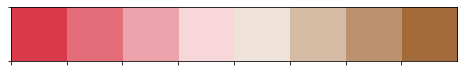

In [531]:
sns.palplot(sns.diverging_palette(9, 40, n=8))


In [532]:
final.columns

Index(['state', 'participation_sat_2017',
       'evidence_based_reading_and_writing_sat_2017', 'math_sat_2017',
       'total_sat_2017', 'participation_act_2017', 'english_act_2017',
       'math_act_2017', 'reading_act_2017', 'science_act_2017',
       'composite_act_2017', 'participation_sat_2018',
       'evidence_based_reading_and_writing_sat_2018', 'math_sat_2018',
       'total_sat_2018', 'participation_act_2018', 'composite_act_2018',
       'english_act_2018', 'math_act_2018', 'reading_act_2018',
       'science_act_2018', 'pct_change_sat', 'pct_change_act'],
      dtype='object')

In [533]:
# Function to remove underscores and format labels properly

def remove_b(input):
    if 'evidence' in input: 
        return 'Reading ' + input.replace("_"," ")[-8:].title()
    return input.replace("_", " ").title()

In [534]:
# Updating x tick labels for the heatmap
labels = list(map(remove_b, final.columns))

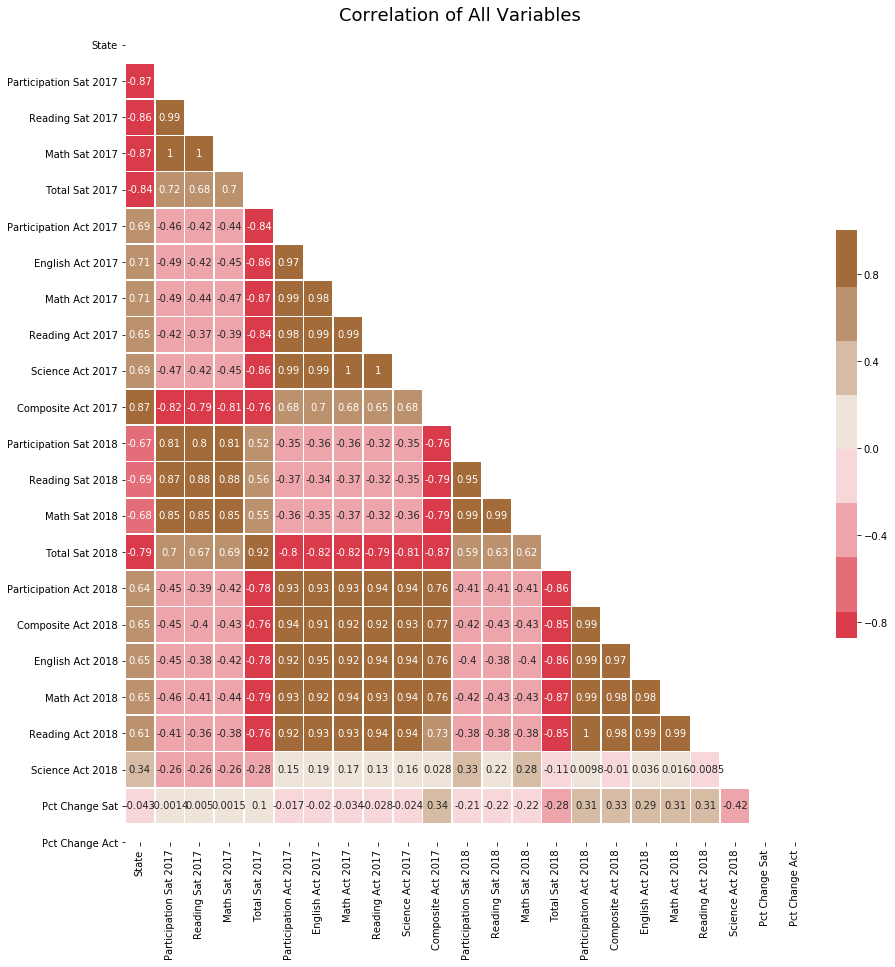

In [535]:
plt.figure(figsize = (15,15))

# Mask for the upper triangle, taken from seaborn website
mask = np.zeros_like(final.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


cmap =(sns.diverging_palette(9, 40, n=8))

sns.heatmap(final.corr(), 
            annot = True,           # Showing the correlation
            mask = mask,            # Mask half of map
            cmap = cmap,            # Set color map to diverging palette
            center = 0, 
            cbar_kws = {'shrink':.5},    # Shrinking color bar 
            xticklabels = labels, yticklabels = labels,    # Set tick labels to what was defined above 
           linewidths = 0.7)

plt.title('Correlation of All Variables', fontdict = {'fontsize':18});

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [536]:
 def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2))         # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows, ncols=2, figsize = (7,7))        # You'll want to specify your figsize
    ax = ax.ravel()                           # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns):        # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], color = 'sienna')                   # feel free to add more settings
        ax[i].set_title(list_of_titles[i])                               # Set titles, labels, etc here for each subplot
        ax[i].set_xlabel(list_of_xlabels[i])
    plt.subplots_adjust(top = 1.2, wspace = 0.3, hspace = 0.3)

    

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

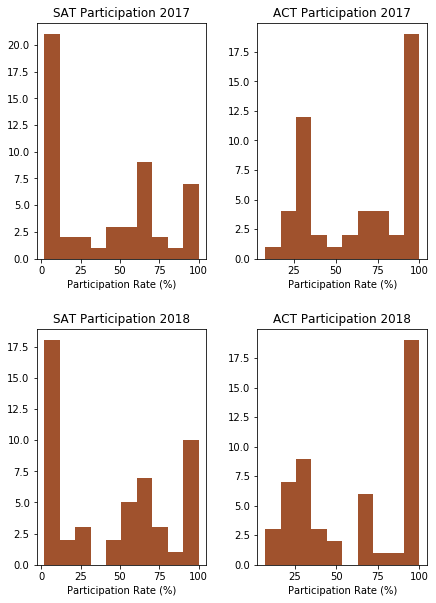

In [537]:
# Histograms for the Participation rates for SAT, ACT 2017, 2018 
subplot_histograms(final,
                   ['participation_sat_2017','participation_act_2017', 'participation_sat_2018', 'participation_act_2018'],
                   ['SAT Participation 2017', 'ACT Participation 2017', 'SAT Participation 2018', 'ACT Participation 2018'],
                    ['Participation Rate (%)' for i in range(4)])




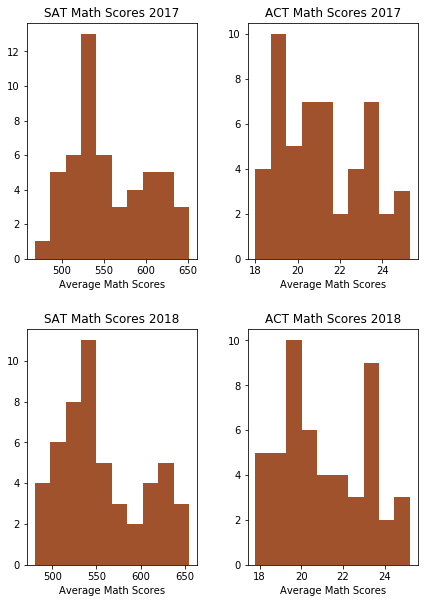

In [538]:
# Histograms for SAT, ACT Math scores 2017, 2018 
subplot_histograms(final,
                   ['math_sat_2017', 'math_act_2017', 'math_sat_2018', 'math_act_2018'],
                   ['SAT Math Scores 2017', 'ACT Math Scores 2017', 'SAT Math Scores 2018', 'ACT Math Scores 2018'],
                    ['Average Math Scores' for i in range(4)])


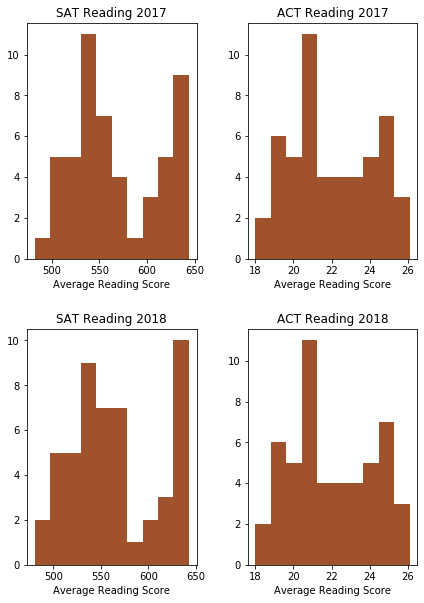

In [539]:
# Histograms for the Reading scores for SAT, ACT 2017, 2018 
subplot_histograms(final,
                   ['evidence_based_reading_and_writing_sat_2017','reading_act_2018', 
                    'evidence_based_reading_and_writing_sat_2018', 'reading_act_2018'],
                   ['SAT Reading 2017', 'ACT Reading 2017', 'SAT Reading 2018', 'ACT Reading 2018'],
                    ['Average Reading Score' for i in range(4)])



#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [540]:
# , list_of_titles, 
def subplot_scatterplot(dataframe, list_of_x, list_of_y, list_of_titles, list_of_xlabels, list_of_ylabels):
    nrows = int(np.ceil(len(list_of_x)/2))         # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows, ncols=2, figsize = (10,5))        # You'll want to specify your figsize
    ax = ax.ravel()                           # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_x):        # Gives us an index value to get into all our lists
        ax[i].scatter(dataframe[list_of_x], dataframe[list_of_y], c = 'sienna')                   # feel free to add more settings
        ax[i].set_title(list_of_titles[i])                               # Set titles, labels, etc here for each subplot
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_ylabel(list_of_ylabels[i])
    plt.subplots_adjust(wspace = 0.5, hspace = 0.3)        
        

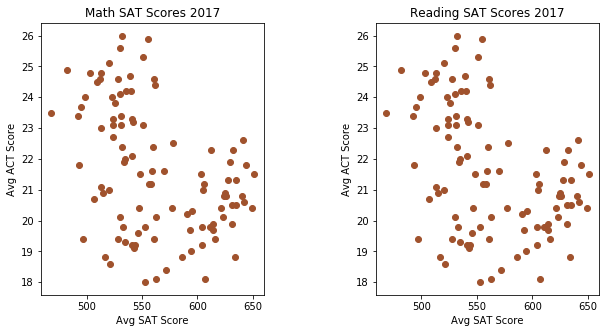

In [541]:
# Left plot: Math SAT v Math ACT 
# Right plot: Reading SAT v Reading ACT

subplot_scatterplot(final, 
                   ['math_sat_2017', 'evidence_based_reading_and_writing_sat_2017'], 
                    ['math_act_2017', 'reading_act_2017'],
                   ['Math SAT Scores 2017', 'Reading SAT Scores 2017'],
                   ['Avg SAT Score' for i in range(2)],
                   ['Avg ACT Score' for i in range(2)])


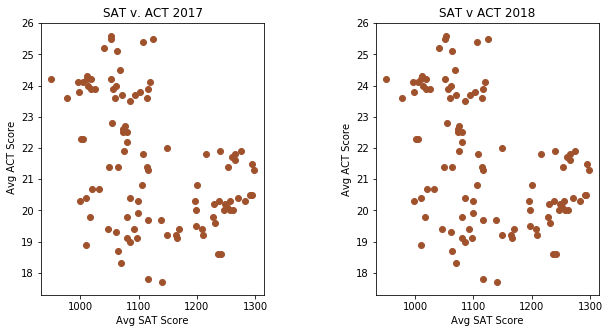

In [542]:
# Left Plot: Total SAT v Composite ACT 2017 
# Right Plot: Total SAT v Composite ACT 2018 

subplot_scatterplot(final, 
                   ['total_sat_2017', 'total_sat_2018'], 
                    ['composite_act_2017', 'composite_act_2018'],
                   ['SAT v. ACT 2017', 'SAT v ACT 2018'],
                   ['Avg SAT Score', 'Avg SAT Score'],
                   [' Avg ACT Score','Avg ACT Score'])


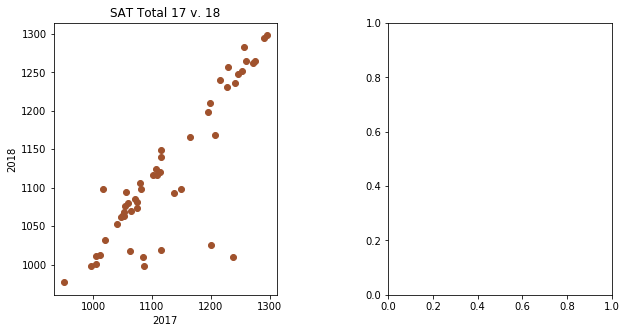

In [543]:
# Total scores for SAT 2017 vs. 2018
subplot_scatterplot(final, 
                   ['total_sat_2017'], 
                    ['total_sat_2018'],
                   ['SAT Total 17 v. 18'],
                   ['2017'],
                   ['2018'])

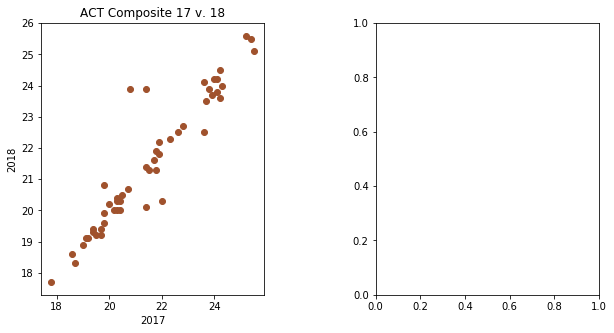

In [544]:
# Composite scores for ACT 2017 vs. 2018
subplot_scatterplot(final, 
                   ['composite_act_2017'], 
                    ['composite_act_2018'],
                   ['ACT Composite 17 v. 18'],
                   ['2017'],
                   ['2018'])

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [545]:
# Function to remove underscores and format labels properly

# def remove_b(input):
#     if 'evidence' in input: 
#         return 'Reading ' + input.replace("_"," ")[-8:].title()
#     return input.replace("_", " ").title()

# data_box['variable'].apply(remove_b)

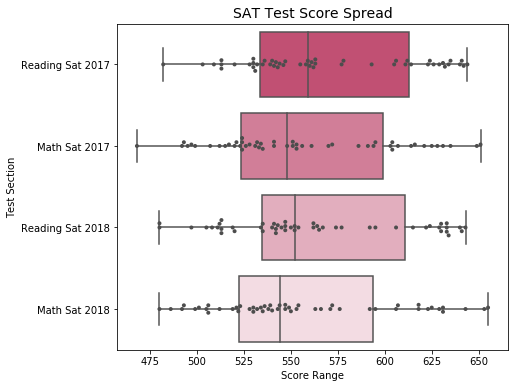

In [546]:
# Plotting SAT 2017 and 2018 scores alongside each other
f, ax = plt.subplots(figsize=(7, 6))

# Set data to specific columns
data_box = pd.melt(final.filter(items = [ 'evidence_based_reading_and_writing_sat_2017',
                                                 'math_sat_2017', 
                                                 'evidence_based_reading_and_writing_sat_2018',
                                                 'math_sat_2018']))

# Format Labels 
data_box['variable'] = data_box['variable'].apply(remove_b)

# Plot the boxplot 
sns.boxplot(x = 'value', y = 'variable', 
            data = data_box,
           
            # Set the color palette and whiskers to the range
           whis = 'range', palette = (sns.diverging_palette(359, 20, n=8)))     


# Showing the distribution of scores 
sns.swarmplot(x = 'value', y = 'variable', data = data_box,
              size=4, color=".3", linewidth=0)

ax.set(ylabel = 'Test Section')
ax.set(xlabel = 'Score Range')

plt.title('SAT Test Score Spread', fontdict = {'fontsize':14});


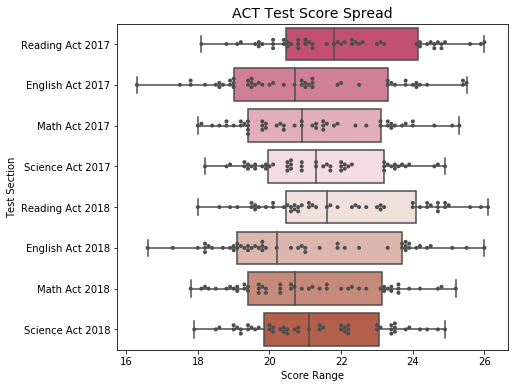

In [547]:
# Plotting ACT 2017 and 2018 scores alongside each other
f, ax = plt.subplots(figsize=(7, 6))

data_box = pd.melt(final.filter(items = ['reading_act_2017',
                                        'english_act_2017', 
                                        'math_act_2017',
                                        'science_act_2017',
                                        'reading_act_2018',
                                        'english_act_2018',
                                        'math_act_2018',
                                        'science_act_2018']))

data_box['variable'] = data_box['variable'].apply(remove_b) 

# Plot the boxplot 
sns.boxplot(x = 'value', y = 'variable', data = data_box,
        
            # Set the color palette and whiskers to the range
           whis = 'range', palette = (sns.diverging_palette(359, 20, n=8)))     

# Showing the distribution of scores 
sns.swarmplot(x = 'value', y = 'variable',
              data = data_box,
              size=4, color=".3", linewidth=0)

ax.set(ylabel = 'Test Section')
ax.set(xlabel = 'Score Range')

plt.title('ACT Test Score Spread', fontdict = {'fontsize':14});



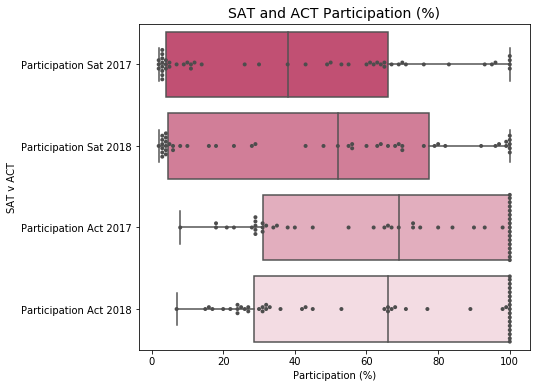

In [548]:
# Plotting participation for exams
f, ax = plt.subplots(figsize=(7, 6))


data_box = pd.melt(final.filter(items = ['participation_sat_2017',
                                        'participation_sat_2018', 
                                        'participation_act_2017',
                                        'participation_act_2018']))

data_box['variable'] = data_box['variable'].apply(remove_b)


# Plot the boxplot 
sns.boxplot(x = 'value', y = 'variable', data = data_box,
        
            # Set the color palette and whiskers to the range
           whis = 'range', palette = (sns.diverging_palette(359, 20, n=8)))     

# Showing the distribution of scores 
sns.swarmplot(x = 'value', y = 'variable',
              data = data_box,
              size=4, color=".3", linewidth=0)

ax.set(ylabel = 'SAT v ACT')
ax.set(xlabel = 'Participation (%)')

plt.title('SAT and ACT Participation (%)', fontdict = {'fontsize':14});



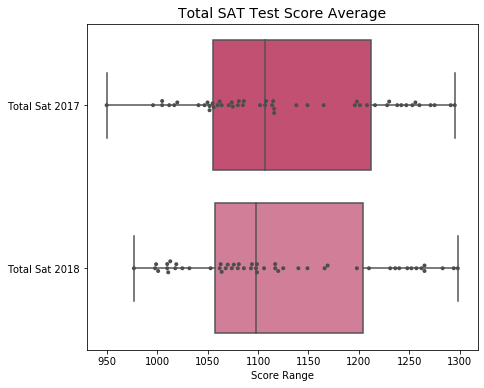

In [549]:
# Plotting total SAT score
f, ax = plt.subplots(figsize=(7, 6))


data_box = pd.melt(final.filter(items = ['total_sat_2017',
                                        'total_sat_2018']))

data_box['variable'] = data_box['variable'].apply(remove_b)

# Plot the boxplot 
sns.boxplot(x = 'value', y = 'variable', data = data_box,
        
            # Set the color palette and whiskers to the range
           whis = 'range', palette = (sns.diverging_palette(359, 20, n=8)))     

# Showing the distribution of scores 
sns.swarmplot(x = 'value', y = 'variable',
              data = data_box,
              size=4, color=".3", linewidth=0)

ax.set(ylabel = '')
ax.set(xlabel = 'Score Range')

plt.title('Total SAT Test Score Average', fontdict = {'fontsize':14});



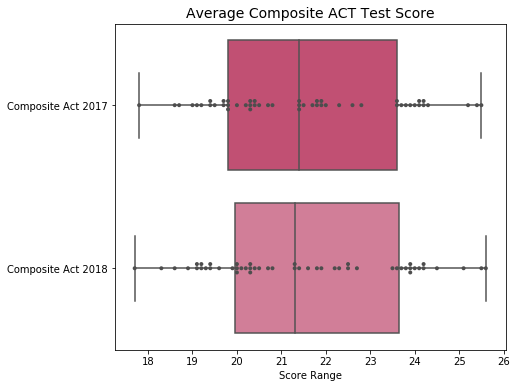

In [550]:
# Plotting composite ACT scores 
f, ax = plt.subplots(figsize=(7, 6))


data_box = pd.melt(final.filter(items = ['composite_act_2017',
                                        'composite_act_2018']))

data_box['variable'] = data_box['variable'].apply(remove_b)

# Plot the boxplot 
sns.boxplot(x = 'value', y = 'variable', data = data_box,
        
            # Set the color palette and whiskers to the range
           whis = 'range', palette = (sns.diverging_palette(359, 20, n=8)))     

# Showing the distribution of scores 
sns.swarmplot(x = 'value', y = 'variable',
              data = data_box,
              size=4, color=".3", linewidth=0)


ax.set(ylabel = '')
ax.set(xlabel = 'Score Range')

plt.title('Average Composite ACT Test Score', fontdict = {'fontsize':14});



#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [567]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

plotly.tools.set_credentials_file(username='myokim', api_key='EIRUb3Ocn28Pb4ZG1yN6')



init_notebook_mode(connected = True)

In [552]:
# Code for states taken from 
# https://stackoverflow.com/questions/48979352/choropleth-map-in-python-using-plotly-without-state-codes

state_codes = {
    'District of Columbia' : 'dc','Mississippi': 'MS', 'Oklahoma': 'OK', 
    'Delaware': 'DE', 'Minnesota': 'MN', 'Illinois': 'IL', 'Arkansas': 'AR', 
    'New Mexico': 'NM', 'Indiana': 'IN', 'Maryland': 'MD', 'Louisiana': 'LA', 
    'Idaho': 'ID', 'Wyoming': 'WY', 'Tennessee': 'TN', 'Arizona': 'AZ', 
    'Iowa': 'IA', 'Michigan': 'MI', 'Kansas': 'KS', 'Utah': 'UT', 
    'Virginia': 'VA', 'Oregon': 'OR', 'Connecticut': 'CT', 'Montana': 'MT', 
    'California': 'CA', 'Massachusetts': 'MA', 'West Virginia': 'WV', 
    'South Carolina': 'SC', 'New Hampshire': 'NH', 'Wisconsin': 'WI',
    'Vermont': 'VT', 'Georgia': 'GA', 'North Dakota': 'ND', 
    'Pennsylvania': 'PA', 'Florida': 'FL', 'Alaska': 'AK', 'Kentucky': 'KY', 
    'Hawaii': 'HI', 'Nebraska': 'NE', 'Missouri': 'MO', 'Ohio': 'OH', 
    'Alabama': 'AL', 'Rhode Island': 'RI', 'South Dakota': 'SD', 
    'Colorado': 'CO', 'New Jersey': 'NJ', 'Washington': 'WA', 
    'North Carolina': 'NC', 'New York': 'NY', 'Texas': 'TX', 
    'Nevada': 'NV', 'Maine': 'ME'}

final['code'] = final['state'].apply(lambda x : state_codes[x])

In [570]:
# Code for choropleth modified from https://plot.ly/python/choropleth-maps/

final['text'] = final['state'] + '<br>' + \
    'Average SAT 2017 ' + str(final['total_sat_2017']) + '<br>' + \
    'Participation (%) ' + str(final['participation_sat_2017'])
 

scl = [
    [0.0, '#E5E1D1'],
    [0.2, '#E2BFB3'],
    [0.4, '#E09E96'],
    [0.6, '#DE7C78'],
    [0.8, '#DC5B5B'],
    [1.0, '#BB2525']
]

data = [go.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = final['code'],
    z = final['total_sat_2017'].astype(float),
    locationmode = 'USA-states',
    text = final['text'],
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Score Range")
)]


layout = go.Layout(
    title = go.layout.Title(
        text = '2017 Average SAT Scores by State <br>(Hover for score)'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename='2017 AVG SAT by State')


/Applications/anaconda3/envs/dsi/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



[Link to 2017 AVG SAT by State](https://plot.ly/~myokim/2/_2017-average-sat-scores-by-state-hover-for-score/)

In [571]:
# Code for choropleth modified from https://plot.ly/python/choropleth-maps/

final['text'] = final['state'] + '<br>' + \
    'Average ACT 2017 ' + str(final['composite_act_2017']) + '<br>' + \
    'Participation (%) ' + str(final['participation_act_2017'])


scl = [
    [0.0, '#E5E1D1'],
    [0.2, '#E2BFB3'],
    [0.4, '#E09E96'],
    [0.6, '#DE7C78'],
    [0.8, '#DC5B5B'],
    [1.0, '#BB2525']
]

data = [go.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = final['code'],
    z = final['composite_act_2017'].astype(float),
    locationmode = 'USA-states',
    text = final['text'],
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Score Range")
)]


layout = go.Layout(
    title = go.layout.Title(
        text = '2017 Average ACT Scores by State <br>(Hover for score)'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename='2017 AVG ACT by State')

/Applications/anaconda3/envs/dsi/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



[Link to 2017 AVG ACT by State](https://plot.ly/~myokim/4/_2017-average-act-scores-by-state-hover-for-score/)

In [572]:
# Code for choropleth modified from https://plot.ly/python/choropleth-maps/

final['text'] = final['state'] + '<br>' + \
    'Participation Rate ' + str(final['participation_sat_2017']) + '<br>'+ \
    'Total Score Average ' + str(final['total_sat_2017'])


scl = [
    [0.0, '#E5E1D1'],
    [0.2, '#E2BFB3'],
    [0.4, '#E09E96'],
    [0.6, '#DE7C78'],
    [0.8, '#DC5B5B'],
    [1.0, '#BB2525']
]

data = [go.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = final['code'],
    z = final['participation_sat_2017'].astype(float),
    locationmode = 'USA-states',
    text = final['text'],
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Participation (%)")
)]


layout = go.Layout(
    title = go.layout.Title(
        text = '2017 SAT Participation by State <br>(Hover for score)'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename='2017 SAT Participation by State')

/Applications/anaconda3/envs/dsi/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



[Link to 2017 SAT Participation by State](https://plot.ly/~myokim/6/_2017-sat-participation-by-state-hover-for-score/)

In [573]:
# Code for choropleth modified from https://plot.ly/python/choropleth-maps/


final['text'] = final['state'] + '<br>' + \
    'Participation Rate ' + str(final['participation_act_2017']) + '<br>'+ \
    'Composite Average ' + str(final['composite_act_2017'])


scl = [
    [0.0, '#E5E1D1'],
    [0.2, '#E2BFB3'],
    [0.4, '#E09E96'],
    [0.6, '#DE7C78'],
    [0.8, '#DC5B5B'],
    [1.0, '#BB2525']
]

data = [go.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = final['code'],
    z = final['participation_act_2017'].astype(float),
    locationmode = 'USA-states',
    text = final['text'],
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Participation (%)")
)]


layout = go.Layout(
    title = go.layout.Title(
        text = '2017 ACT Participation by State <br>(Hover for score)'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename='2017 ACT Participation by State')

/Applications/anaconda3/envs/dsi/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



[Link to 2017 ACT Participation by State](https://plot.ly/~myokim/8/_2017-act-participation-by-state-hover-for-score/)

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

**Answers:**

- States that had lower participation in the SAT/ACT had greater scores in those respective exams. 
    - Iowa had a 2% participation in the SAT while they scored in the top 5 for total SAT in 2017.
- There was a greater participation rate for the ACT than the SAT
    - In 2017, average SAT participation was 40% while average ACT was 65%. 
- On average, students did better on the reading sections compared to the math 
    - for the SAT, the 2017 average reading score was 570 while math was 557. 
    - for the ACT the 2017 average reading score was 22 while math was 21. 
-  Participation for the SAT increased from 2017 to 2018 while participation for the ACT decreased 
- Changes in total test scores of both exams were not significant 
- talk about the range in the data? 

- More mid west and southern states took the ACT while coastal states took the SAT 
    - Participation was close to 100% for all mid west and southern states 
    - Less number of states had 100% for SAT (only 4 states) 

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: No

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: No, the distributions were not normal. The skewed distributions will affect the mean and median of the data. 

- Math and Reading scores were right skewed
- For the SAT participation -> right skew
    - Mean is less than the median 
- For the ACT participation -> left skew 
    - Mean is greater than the median

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: Given just the participation rates, it would make sense to conduct statistical inference. The rates are the correct parameter to use for statistical inference.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: It does not make sense to conduct statistical inference to compare the different math scores. The math scores are not a percent of the population

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [557]:
# Data set is of a population so not appropriate?

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [559]:
final.sort_values('pct_change_sat')[['state', 'pct_change_sat', 'pct_change_act']].head()

,state,pct_change_sat,pct_change_act
44,Utah,-0.18,0.00
5,Colorado,-0.15,0.15
13,Illinois,-0.09,0.12
48,West Virginia,-0.08,-0.00
11,Hawaii,-0.07,-0.01


In [560]:
# Add column for changes in participation for SAT and ACT 
final['part_change_sat'] = round(((final['participation_sat_2018'] - 
                       final['participation_sat_2017'])/
                       final['participation_sat_2017']),2)

final['part_change_act'] = round(((final['participation_act_2018'] - 
                       final['participation_act_2017'])/
                       final['participation_act_2017']),2)

In [561]:
# Decreases in SAT participation top 5
final.sort_values('part_change_sat')[['state', 'part_change_sat', 'part_change_act']].head()

,state,part_change_sat,part_change_act
9,Florida,-0.33,-0.10
28,Nevada,-0.12,0.00
8,District of Columbia,-0.08,0.00
2,Arizona,-0.03,0.06
50,Wyoming,0.00,0.00


In [562]:
# Decreases in ACT participation top 5
final.sort_values('part_change_act')[['state', 'part_change_sat', 'part_change_act']].head()

,state,part_change_sat,part_change_act
5,Colorado,8.09,-0.70
13,Illinois,10.00,-0.54
1,Alaska,0.13,-0.49
39,Rhode Island,0.37,-0.29
22,Michigan,0.00,-0.24


In [563]:
# Increases in SAT participation top 5
final.sort_values('part_change_sat', ascending = False)[['state', 'part_change_sat', 'part_change_act']].head()

,state,part_change_sat,part_change_act
13,Illinois,10.00,-0.54
5,Colorado,8.09,-0.70
48,West Virginia,1.00,-0.06
3,Arkansas,0.67,0.00
35,Ohio,0.50,0.33


In [564]:
# Increases in ACT participation top 5
final.sort_values('part_change_act', ascending = False)[['state', 'part_change_sat', 'part_change_act']].head()

,state,part_change_sat,part_change_act
35,Ohio,0.50,0.33
27,Nebraska,0.00,0.19
20,Maryland,0.10,0.11
2,Arizona,-0.03,0.06
37,Oregon,0.12,0.05


- sources are cited in the read.me

### Iowa
- Iowa is interesting to look at because lower participation rate in ACT and really low participation in SAT
    - Only requires the ISASP instead of either SAT or ACT 
    - 24% of public schools need   "targeted support and improvement" (subgroup of the student population had scores as low as the lowest 5% of the state)
    - 3% of Iowa's high schools had graduation rates of under 67%
    
- Colorado: 70% drop in ACT participation and 800% increase in SAT participation 
    - Change from ACT being mandatory exam to SAT 
    
- Ohio has 33% increase in ACT participation and 50% increase in SAT participation 
    - SAT is also now available to take during school days, previously it was just the ACT

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

(Background taken from read.me): 
Background:
Iowa currently does not require the ACT or the SAT. Instead, they have in place the ISASP. Perhaps students are opting to rely on just the ISASP rather than the ACT or SAT. In 2019 however, 3% of Iowa's high schools had graduation rates of under 67%. Additionally, 24% of Iowa high schools were seen as needing "targeted support and improvement" as a subgroup of the student population had scores as low as the lowest 5% of the state. 

As Iowa does not require the ACT or the SAT, it is understandable that their participation rates are considerably lower than their other midwest counterparts who do require at least one exam. Interestingly, from EDA it can be noted that Iowa's average total SAT scores ranked in the top 5 nationally. EDA helped to single out Iowa from the other states as a state with high opportunity to increase participation rates. The College Board can aim to target the remaining students who do not take either exam. 

Recommendations: 
The College Board should look into which students are not taking either exam and target them specifically. They could also work with the state education system and work to collaborate and make the SAT a mandatory exam. College Board can also target students who do not excel in science as the ACT includes a science portion. 

Additional information: 
Having data on student demographics such as income level would be beneficial. Students of varying income levels do not face the same opportunities in education. It would also be interesting to see how SAT prepatory courses and their availability impact student scores and participation rates. College Board should survey high school students/parents and gauge their reasoning for choosing one exam over another. 
